# skspec 

### Objective

Demo was presented to George Washington University 12/5/1

### Environment Setup

Configure notebook style (see NBCONFIG.ipynb), add imports and paths.  The **%run** magic used below <font color='red'>**requires IPython 2.0 or higher.**</font>

In [1]:
%run NBCONFIG.ipynb
%pylab inline

Populating the interactive namespace from numpy and matplotlib
['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


/home/adam/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


Populating the interactive namespace from numpy and matplotlib


#### Step 1: Import some Data from csv

In [2]:
from skspec.data import aunps_water

ts = aunps_water()
ts.iloc[0:5, 0:5]

,2013-02-04 15:40:48,2013-02-04 15:41:34,2013-02-04 15:42:20,2013-02-04 15:43:06,2013-02-04 15:43:52
200,305.53,306.31,305.23,305.17,307.22
201,311.67,313.43,312.75,314.12,314.88
202,318.09,319.56,319.12,319.51,319.13
203,323.47,324.90,322.34,324.48,325.61
204,340.97,340.09,340.86,342.99,341.78


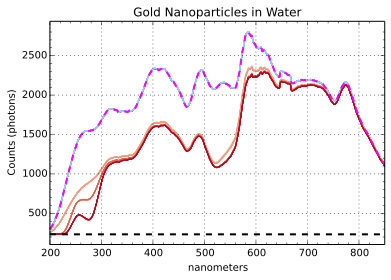

In [3]:
ax = ts.plot()
ts.reference = 0
ts.varunit = 's'
ts.baseline.T.plot(color='k', ls='--', ax=ax)
ts.reference.T.plot(color='magenta', ls = '--', ax=ax);

CRITICAL:skspec.core.spectra:Subtracting baseline, but may not have all: elements being equal.  Fix index


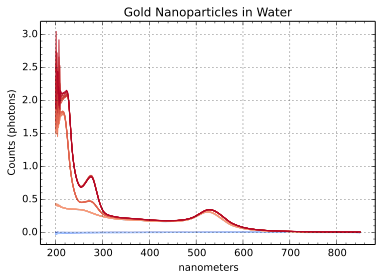

In [4]:
ts.sub_base()
ts.norm = 'a'
ts.plot();

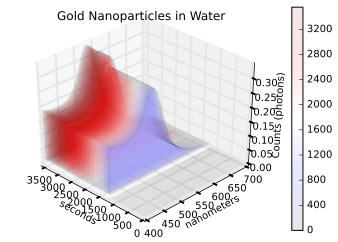

In [5]:
aunps = ts.nearby[400:700]
aunps.plot(kind='waterfall', cmap='seismic', cbar=True)
aunps.name='SPR peak of nanoparticles'

### Let's cut out curves based on the value of their max values.  If the max absorbance is less than 0.10 absorbance units.

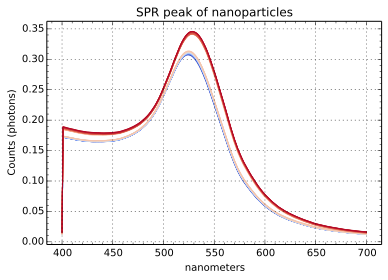

In [6]:
mask = aunps.max() > 0.1
aunps_cut = aunps[aunps.columns[mask]]
aunps_cut.plot();

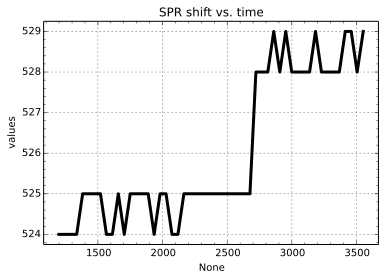

In [7]:
aunps_cut.idxmax().plot(title='SPR shift vs. time');

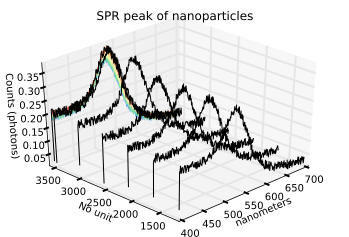

In [8]:
noise = np.random.rand( *aunps_cut.shape )
aunps_noisy = aunps_cut + 0.035*noise
aunps_noisy.plot(kind='spec3d', color='k');

### Spectral gui

In [9]:
from skspec.interact import SpectraModel, SpectraGui

specmodel = SpectraModel(spec=aunps)
gui = SpectraGui(model=specmodel)
gui

<hr>
<br>


<div style="float:left; \">
    <img src="https://avatars0.githubusercontent.com/u/1972276?s=460" 
 align=left; text-align:center; style="float:left; margin-left: 5px; margin-top: -25px; width:150px; height:150px" /> 
</div>

<div style="float:left; \"><a href="https://github.com/hugadams">
    <img src="https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>


<div style="float:left; \"><a href="https://twitter.com/hughesadam87">
    <img src="http://paymentmagnates.com/wp-content/uploads/2014/04/twitter-icon.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.researchgate.net/profile/Adam_Hughes2?ev=hdr_xprf">
    <img src="http://www.txhughes.com/images/button-researchgate.png" 
 align=left; text-align:center; style="float:left; margin-left: -175px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.linkedin.com/profile/view?id=121484744&trk=nav_responsive_tab_profile_picg">
    <img src="http://smallbusinessesdoitbetter.com/wordpress/wp-content/uploads/li.png" 
 align=left; text-align:center; style="float:left; margin-left: -75px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:center; \"><a href="http://www.gwu.edu/">
    <img src="https://raw.githubusercontent.com/hugadams/pyparty/master/pyparty/data/gwu.png" 
 align=center style="float:center; margin-right: 30px; margin-top: -35px; width:335px; height:180px" />
</div>


<h4 style="margin-top:0px;"> This notebook is free for redistribution. If citing, please reference as: </h4>
- *Hughes, A. (2012). [A Computational Framework for Plasmonic Nanobiosensing](https://www.researchgate.net/publication/236672995_A_Computational_Framework_for_Plasmonic_Nanobiosensing).  Python in Science Conference [SCIPY].* 


<h3 style="margin-top:30px;"> Questions or Feedback? </h3>

* skspec@groups.google.com
* hugadams@gwmail.gwu.edu 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>




<h3 style="margin-top:30px;"> References: </h3>

* [1] : **REF 1**
* [2] : **REF 2**





<h3 style="margin-top:30px;"> Related: </h3>

   * <a href="https://github.com/hugadams/pyparty" target="_blank">skspec: Exploratory Spectral Data Analysis</a>
   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyparty: Image Analysis of Particles</a>
   * <a href="http://lorenabarba.com/" target="_blank">Lorena A. Barba (GWU Engineering)</a>
   * <a href="http://www.youtube.com/watch?v=W7RgkHM-B60" target="_blank">xray: extended arrays for scientific datasets</a>



<h3 style="margin-top:30px;">Notebook styling ideas:</h3>

* <a href="http://blog.louic.nl/?p=683" target="_blank">Louic's web blog</a>
* <a href="https://plot.ly/feed" target="_blank">Plotly</a>
* <a href="http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html" target="_blank">Publication-ready the first time: Beautiful, reproducible plots with Matplotlib</a>

<br>
<hr>